# 6장

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 6.1 매개변수 갱신

- **신경망 학습의 목적** : 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것 => 최적화

### 6.1.1 모험가 이야기

[노션 참고]

### 6.1.2 확률적 경사 하강법(SGD)

In [2]:
# 클래스 구현
class SGD:
    def __init__(self, lr=0.01): # lr : 학습률
        self.lr = lr # 학습률을 인스턴스 변수로 유지.
        
    def update(self, params, grads): # params, grads : 딕셔너리 변수
        for key in params.keys():
            params[key] -= self.lr * grads[key]
            # params['W1'] : 가중치 매개변수
            # grads['W1'] : 기울기

In [ ]:
# 예시 구현(실제로 작동하는 코드는 아님!)
network = TwoLayerNet(...)
optimizer = SGD() # 최적화를 의미하는 optimizer로 설정.
# 모멘텀 기법에서는 optimizer = Momentum()로 설정하면 됨.

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...

### 6.1.3 SGD의 단점

[노션 참고]

### 6.1.4 모멘텀

In [3]:
# 모멘텀 기법 구현
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9): # alpha(momentum) = 0.9로 설정
        self.lr = lr
        self.momentum = momentum
        self.v = None # 물체의 속도 : 초기화 때 아무 값도 담지 않음.
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val) # 특정 shape의 행렬에 0을 채워 만듦.
                
            for key in params.keys():
                self.v[key] = self.momentum * self.v[key] - self.lr * grads[key] # 모멘텀 * 속도 - 학습률 * 기울기
                params[key] += self.v[key] # 가중치 갱신

### 6.1.5 AdaGrad

In [4]:
# AdaGrad 기법 구현
class AdaGrad:
    def  __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
            for key in params.keys():
                self.h[key] += grads[key] * grads[key]
                params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
                # 0으로 나누는 것을 방지하기 위해 1e-7을 더해준다. 

### 6.1.6 Adam

In [5]:
# 구현해놓은 Adam 클래스 훑어보기

class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

### 6.1.7 어느 갱신 방법을 이용할 것인가?

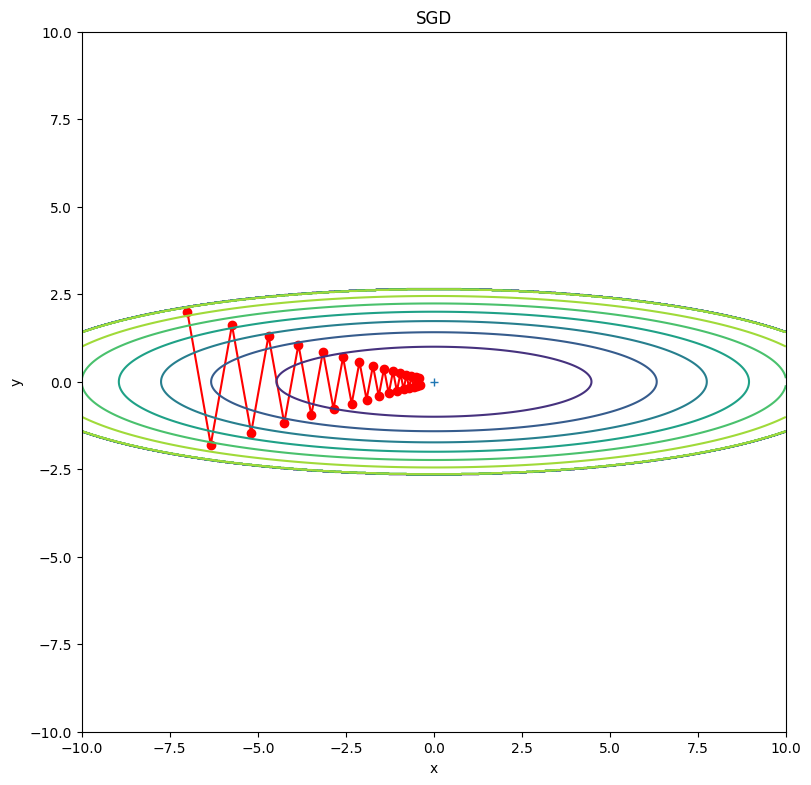

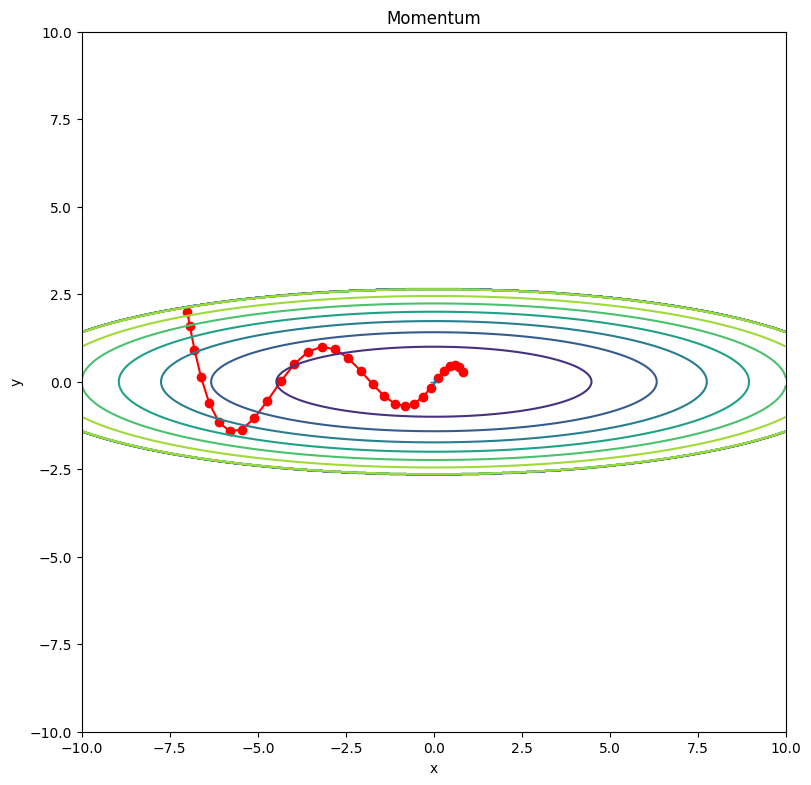

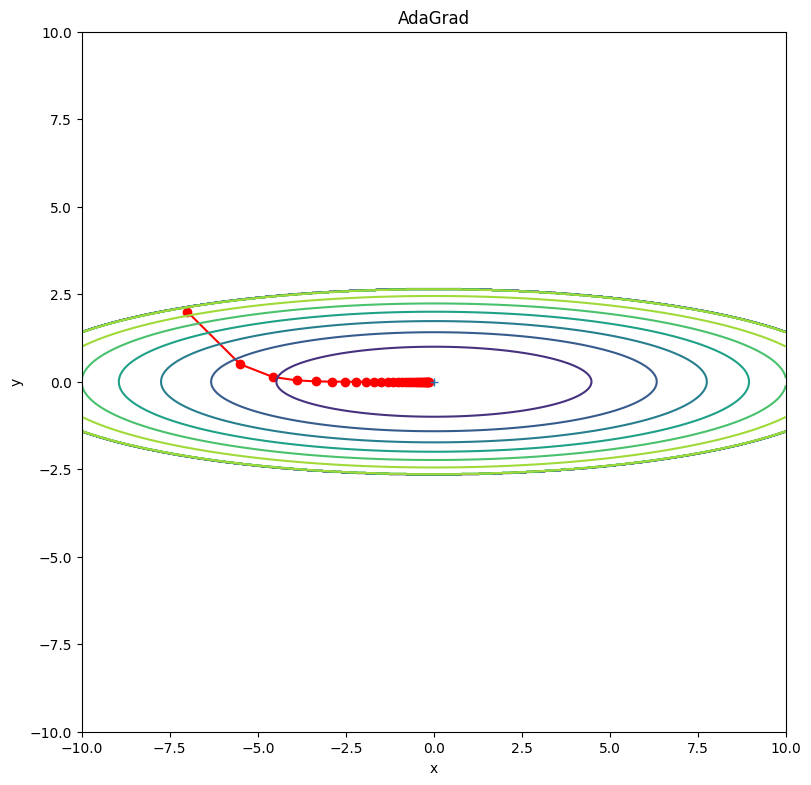

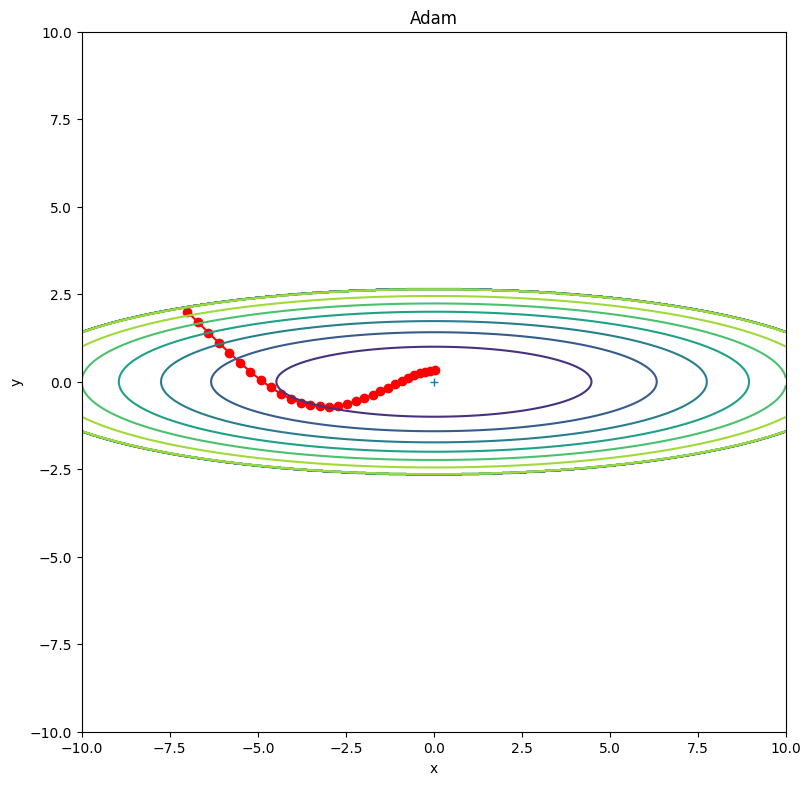

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.figure(figsize=(20,20))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()


### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

===========iteration:0===========
SGD:2.439048876116318
Momentum:2.278653022740828
AdaGrad:2.0226804939487697
Adam:2.1907635014685836
===========iteration:100===========
SGD:1.5172237767730967
Momentum:0.33659240113182
AdaGrad:0.11901235662435752
Adam:0.23308578744696887
===========iteration:200===========
SGD:0.7496694608458945
Momentum:0.18922731147489277
AdaGrad:0.0827609870915075
Adam:0.1277677997502438
===========iteration:300===========
SGD:0.6183185578089513
Momentum:0.24502463855094742
AdaGrad:0.08415499506479379
Adam:0.17235852978123967
===========iteration:400===========
SGD:0.43271626325043744
Momentum:0.19630113954676187
AdaGrad:0.09196975993646697
Adam:0.14803328105973734
===========iteration:500===========
SGD:0.44186568952065863
Momentum:0.19547000906077375
AdaGrad:0.07868756547743344
Adam:0.16695254827284556
===========iteration:600===========
SGD:0.3726281351827073
Momentum:0.13808540006421843
AdaGrad:0.04840419891051202
Adam:0.06791566349713338
===========iteration:70

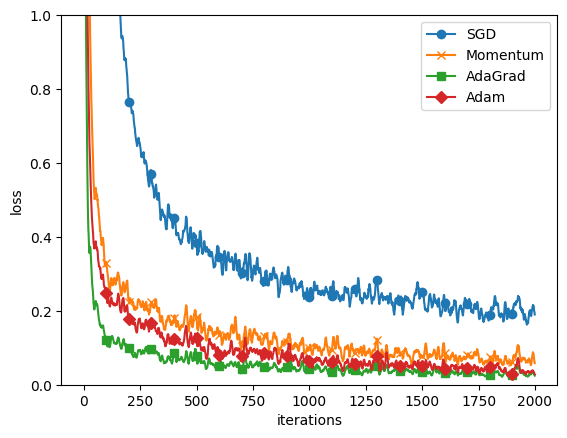

In [2]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


## 6.2 가중치의 초깃값

### 6.2.1 초깃값을 0으로 하면?

[노션 참고]

### 6.2.2 은닉층의 활성화값 분포

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1 # 표준편차가 1인 경우
    # 초깃값을 바꿔가며 해볼 수 있음
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

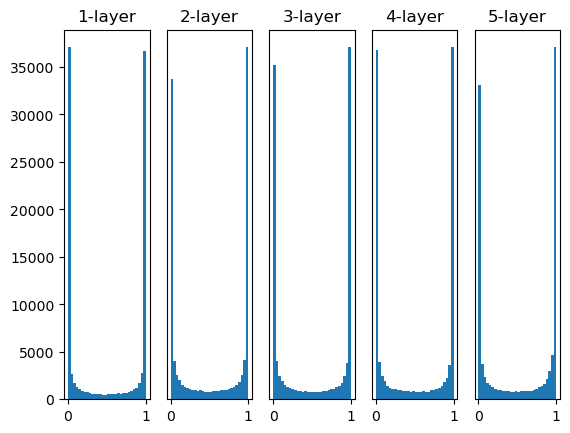

In [9]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

===========iteration:0===========
std=0.01:2.3025276594383524
Xavier:2.3132868592492706
He:2.314757425222746
===========iteration:100===========
std=0.01:2.3024254994127746
Xavier:2.2501637080134684
He:1.5898785436721434
===========iteration:200===========
std=0.01:2.302206252877153
Xavier:2.165486714657038
He:0.8373060296197797
===========iteration:300===========
std=0.01:2.3047396999553253
Xavier:1.943140587987916
He:0.5754842125241413
===========iteration:400===========
std=0.01:2.302852869563983
Xavier:1.3709312590120306
He:0.40856263939149184
===========iteration:500===========
std=0.01:2.296519758226213
Xavier:0.8562806708709876
He:0.36095282037908577
===========iteration:600===========
std=0.01:2.3029909237282786
Xavier:0.7503173190358375
He:0.3775780494495936
===========iteration:700===========
std=0.01:2.3041260886082133
Xavier:0.6247553869589751
He:0.3562273306977326
===========iteration:800===========
std=0.01:2.300131154530484
Xavier:0.44818338520214807
He:0.296838613761017

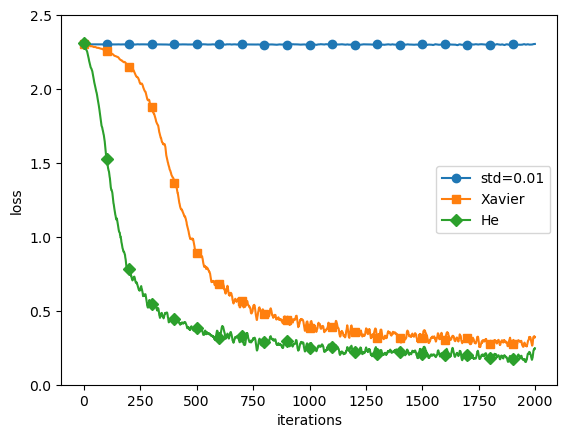

In [3]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


## 6.3 배치 정규화

### 6.3.1 배치 정규화 알고리즘

[노션 참고]

### 6.3.2 배치 정규화의 효과

============== 1/16 ==============
epoch:0 | 0.093 - 0.104
epoch:1 | 0.116 - 0.116


c:\Users\love2\anaconda3\Lib\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
c:\Users\love2\anaconda3\Lib\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in scalar multiply
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
c:\Users\love2\anaconda3\Lib\common\functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True) # 오버플로 대책


epoch:2 | 0.097 - 0.13
epoch:3 | 0.097 - 0.138
epoch:4 | 0.097 - 0.16
epoch:5 | 0.097 - 0.177
epoch:6 | 0.097 - 0.195
epoch:7 | 0.097 - 0.209
epoch:8 | 0.097 - 0.225
epoch:9 | 0.097 - 0.237
epoch:10 | 0.097 - 0.252
epoch:11 | 0.097 - 0.265
epoch:12 | 0.097 - 0.284
epoch:13 | 0.097 - 0.298
epoch:14 | 0.097 - 0.308
epoch:15 | 0.097 - 0.325
epoch:16 | 0.097 - 0.338
epoch:17 | 0.097 - 0.352
epoch:18 | 0.097 - 0.362
epoch:19 | 0.097 - 0.385
============== 2/16 ==============


C:\Users\love2\AppData\Local\Temp\ipykernel_14084\2605121271.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


epoch:0 | 0.099 - 0.103
epoch:1 | 0.097 - 0.093
epoch:2 | 0.097 - 0.121
epoch:3 | 0.097 - 0.138
epoch:4 | 0.097 - 0.167
epoch:5 | 0.097 - 0.184
epoch:6 | 0.097 - 0.226
epoch:7 | 0.097 - 0.245
epoch:8 | 0.097 - 0.269
epoch:9 | 0.097 - 0.288
epoch:10 | 0.097 - 0.316
epoch:11 | 0.097 - 0.34
epoch:12 | 0.097 - 0.347
epoch:13 | 0.097 - 0.374
epoch:14 | 0.097 - 0.379
epoch:15 | 0.097 - 0.387
epoch:16 | 0.097 - 0.415
epoch:17 | 0.097 - 0.438
epoch:18 | 0.097 - 0.44
epoch:19 | 0.097 - 0.454
============== 3/16 ==============
epoch:0 | 0.106 - 0.081
epoch:1 | 0.285 - 0.166
epoch:2 | 0.436 - 0.199
epoch:3 | 0.534 - 0.253
epoch:4 | 0.596 - 0.288
epoch:5 | 0.662 - 0.324
epoch:6 | 0.719 - 0.345
epoch:7 | 0.76 - 0.373
epoch:8 | 0.792 - 0.409
epoch:9 | 0.829 - 0.433
epoch:10 | 0.86 - 0.469
epoch:11 | 0.88 - 0.48
epoch:12 | 0.894 - 0.506
epoch:13 | 0.913 - 0.527
epoch:14 | 0.926 - 0.553
epoch:15 | 0.935 - 0.571
epoch:16 | 0.945 - 0.588
epoch:17 | 0.949 - 0.605
epoch:18 | 0.958 - 0.619
epoch:19 | 0.969

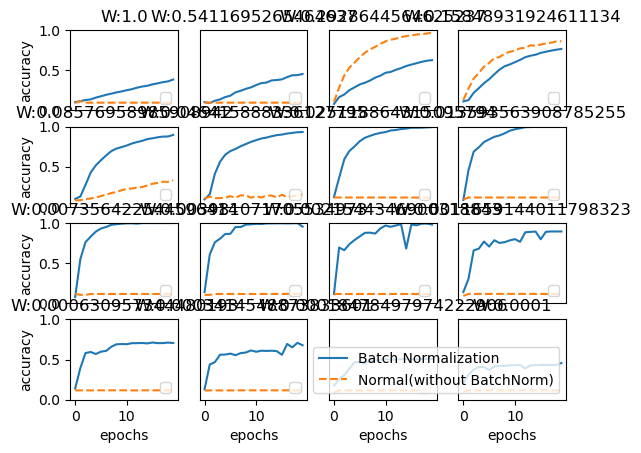

In [4]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()


## 6.4 바른 학습을 위해

### 6.4.1 오버피팅

In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [7]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

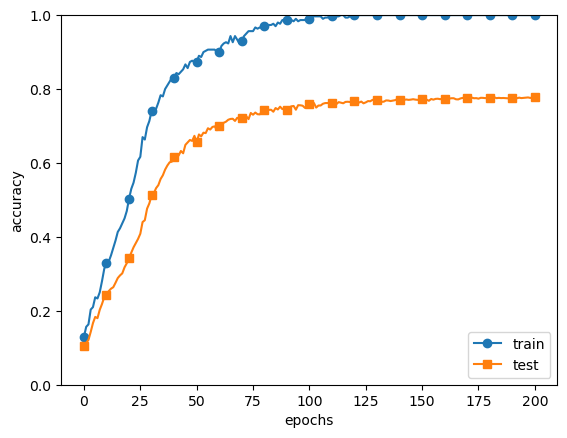

In [8]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6.4.2 가중치 감소

[노션 참고]

### 6.4.3 드롭아웃

In [9]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

## 6.5 적절한 하이퍼파라미터 값 찾기

### 6.5.1 검증 데이터

In [10]:
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈현 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 6.5.2 하이퍼파라미터 최적화

[노션 참고]

### 6.5.3 하이퍼파라미터 최적화 구현하기

In [11]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

val acc:0.05 | lr:6.529984783634838e-05, weight decay:1.6265576434106683e-07
val acc:0.4 | lr:0.0035825375396123797, weight decay:1.3123754589379932e-07
val acc:0.07 | lr:2.3308754520685553e-05, weight decay:6.365496021314926e-08
val acc:0.28 | lr:0.0011967704936313303, weight decay:2.5935145290068404e-07
val acc:0.17 | lr:0.0010794002284462184, weight decay:1.6444565201471584e-08
val acc:0.78 | lr:0.008028716824183275, weight decay:6.374564544954597e-06
val acc:0.08 | lr:2.6917853789816163e-05, weight decay:5.143123904332972e-05
val acc:0.06 | lr:1.133785328856698e-06, weight decay:1.1018966724826968e-07
val acc:0.11 | lr:4.164309401309656e-05, weight decay:1.8433718280257058e-06
val acc:0.13 | lr:4.433785450941698e-06, weight decay:1.6446147503408855e-06
val acc:0.13 | lr:6.589698851862074e-05, weight decay:4.437815385981449e-06
val acc:0.31 | lr:0.001909599990859913, weight decay:3.598326345647316e-05
val acc:0.16 | lr:0.000293805111153825, weight decay:6.235684101315885e-05
val acc

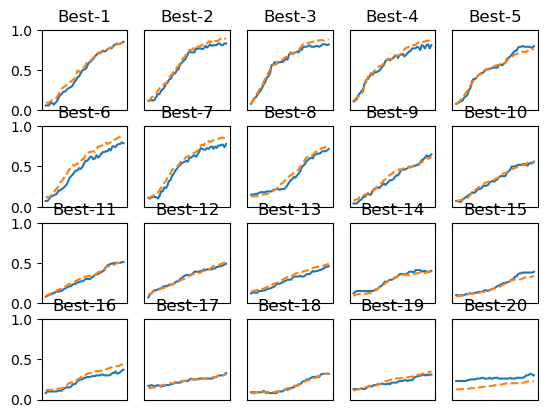

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()


## 6.6 정리

**이번 장에서 배운 내용**
- 매개변수 갱신 방법에는 확률적 경사 하강법(SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있다.
- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는 데 매우 중요하다.
- 가중치의 초깃값으로는 'Xavier 초깃값'과 'He 초깃값'이 효과적이다.
- 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
- 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
- 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.